In [1]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import scipy.integrate as sp

In [2]:
dates, times, flow = np.loadtxt('water.csv', unpack = True, usecols = (2, 3, 5), dtype=object)
flow = np.array(flow, dtype=float)
t = np.zeros(dates.size)
for i in range(dates.size):
    d = datetime.strptime(dates[i]+times[i], '%Y-%m-%d%H:%M')
    t[i] = d.timestamp()
start_time = t[0]
t -= start_time

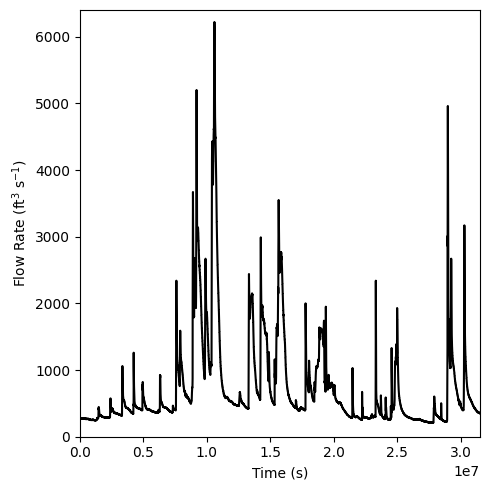

In [3]:
fig, ax = plt.subplots(figsize = (5,5))
# ax2 = ax.twiny()
# ax2.plot(x, y2, color = 'b')
ax.plot(t, flow, 'k')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Flow Rate (ft$^3$ s$^{-1}$)')
ax.set_ylim(0, 6400)
ax.set_xlim(0, t[-1])
plt.tight_layout()

In [43]:
from scipy.integrate import quad

def f(t0):
    if t0 > t[-1] or t0 < 0:
        return 0
    else:
      return flow[np.where(t<t0)[0][-1]]

i = 2
quad(f, 0, t[i]), sp.simpson(flow[:i], t[:i])
# flow[:1]

((493200.0, 5.475619957451272e-09), 246600.0)

$$\sum_{t_i=0}^T f($$

In [4]:
c = 0
for i in range(len(flow)-1):
    c += flow[i]*(t[i+1]-t[i])
d=sp.simpson(flow, t)
e=sp.trapezoid(flow, t)

In [5]:
c, d, e

(23233775400.0, 23233431037.5, 23233843800.0)

In [6]:
c-d, c-e

(344362.5, -68400.0)

(array([269., 272., 269.]),
 array([180000., 180900., 181800.]),
 487800.0,
 486900.0)

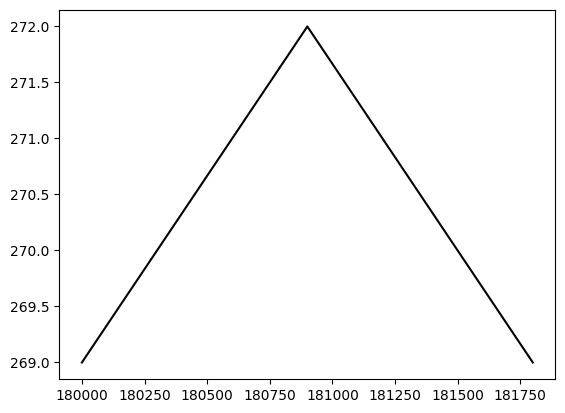

In [7]:
f=sp.simpson(flow[200:203],t[200:203])
g=sp.trapezoid(flow[200:203],t[200:203])
plt.plot(t[200:203], flow[200:203], 'k')
flow[200:203],t[200:203], f,g
# plt.ylim(0, 300)

$$O(h^5)$$


In [8]:
a = - flow.size + 2**16
flow1 = np.concatenate((flow, np.zeros(a+1)))
# flow.shape, 2**16
sp.romb(flow1, t)

array([0.00000000e+00, 2.32069743e+10, 4.64139487e+10, ...,
       8.13079553e+14, 8.13102760e+14, 8.13125966e+14])

### Integration

$$
f(t)\\W(T)
$$

$$
f(t) = \frac{dW}{dt}
$$

$$
\implies W(T) = \int_0^T f(t)dt
$$

In [9]:
s = 0
